In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor

In [23]:
# Importing data from pre-processing

X_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_asthma")
X_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_asthma")
y_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_asthma")
y_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_asthma")

In [24]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54242, 12) (54242, 2) (18081, 12) (18081, 2)


In [25]:
print(type(y_train), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [26]:
y_train.head()

,CensusTract,Asthma_prevalence
0,45059920900,10.0
1,39139001900,10.1
2,17043841607,8.8
3,6067004203,12.0
4,42013010102,11.0


In [27]:
X_train.head()

,CensusTract,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,45059920900,8.633071,39.888501,0.184968,37.982370,0.529203,7.763841,0.361930,0.020469,0.355881,0.224351,0.000001
1,39139001900,8.446155,43.050316,0.241602,21.671377,0.281817,320.463621,0.254479,0.014958,0.184719,0.380291,0.006587
2,17043841607,9.563376,46.630290,0.676896,31.742870,0.418369,467.354665,0.238573,0.730274,0.806808,1.547085,0.558183
3,6067004203,10.584086,47.731419,0.330271,38.078725,0.642882,692.826248,0.179952,0.128865,1.994108,1.600140,0.000600
4,42013010102,8.610761,42.415550,0.216278,21.157482,0.261884,718.744392,0.594400,0.062650,0.849857,1.088732,0.003054


In [28]:
# Re-indexing

X_test.set_index("CensusTract", inplace=True)
X_train.set_index("CensusTract", inplace=True)
y_test.drop("CensusTract", axis=1, inplace=True)
y_train.drop("CensusTract", axis=1, inplace=True)

In [29]:
# Getting the y-data into correct shape

y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54242, 11) (54242,) (18081, 11) (18081,)


In [30]:
X_train.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
45059920900,8.633071,39.888501,0.184968,37.982370,0.529203,7.763841,0.361930,0.020469,0.355881,0.224351,0.000001
39139001900,8.446155,43.050316,0.241602,21.671377,0.281817,320.463621,0.254479,0.014958,0.184719,0.380291,0.006587
17043841607,9.563376,46.630290,0.676896,31.742870,0.418369,467.354665,0.238573,0.730274,0.806808,1.547085,0.558183
6067004203,10.584086,47.731419,0.330271,38.078725,0.642882,692.826248,0.179952,0.128865,1.994108,1.600140,0.000600
42013010102,8.610761,42.415550,0.216278,21.157482,0.261884,718.744392,0.594400,0.062650,0.849857,1.088732,0.003054


#### In the EDA notebook, I have already done multiple linear regression with OLS and found no reasonable correlation. 

In [31]:
# Instantiating RandomForestRegressor with default hyperparameters

rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
y_pred = rf.predict(X_test)

In [33]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5538174838351156
MAE: 0.7502191250483934
MSE: 1.0615335166196562
RMSE: 1.030307486442594


#### This R<sup>2</sup> value is too low for this to be a reasonable fit.

In [75]:
# Instantiating RandomForestRegressor and using RandomizedSearch to get best values for n_estimators and max_depth

rf = RandomForestRegressor() 
params = {"n_estimators": range(1,500), "max_depth":range(1,30)}

rs = RandomizedSearchCV(rf, params)

In [ ]:
rs.fit(X_train, y_train)   

In [12]:
rs.best_estimator_

RandomForestRegressor(max_depth=29, n_estimators=401)

In [27]:
# Instantiating RandomForestRegressor with hyperparameters determined from RandomizedSearch

rf = RandomForestRegressor(max_depth=29, n_estimators=401)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=29, n_estimators=401)

In [28]:
y_pred = rf.predict(X_test)

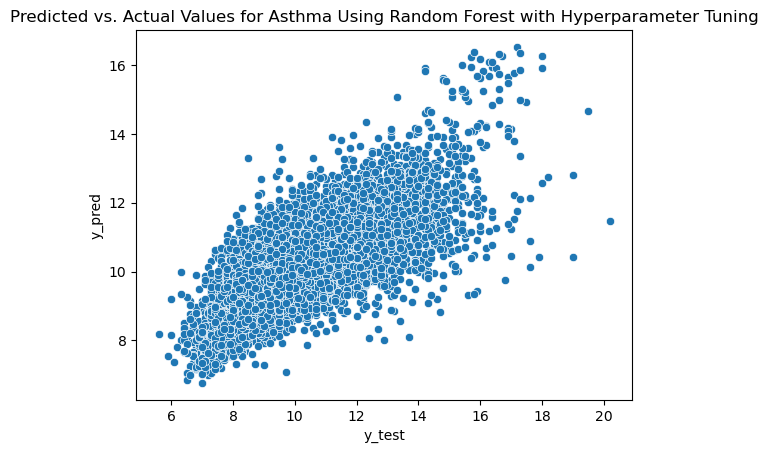

In [29]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Asthma Using Random Forest with Hyperparameter Tuning")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [30]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE"', mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5553708148321812
MAE: 0.7489252481394579
MSE: 1.0578379148063841
RMSE: 1.0285124767383156


#### The hyperparameter tuning did not make much different in the R<sup>2</sup> value.

In [ ]:
# Instantiating AdaBoostRegressor with default hyperparameters

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = ada.predict(X_test)

In [ ]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.03404484159174981
MAE: 1.3675407630942722
MSE: 3.419808487689778
RMSE: 1.8492724211672487


### Adaboost with the default hyperparameters does not give reasonable results.

In [69]:
# Instantiating AdaBoost Regressor and using RandomizedSearch to get best values for best n_estimators and learning rate

ada = AdaBoostRegressor()
params = {"n_estimators": range(1,500), "learning_rate":np.arange(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [70]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.30...
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01]),
                                        'n_estimators': range(1, 500)})

In [71]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=4.0009999999999994, n_estimators=62)

In [72]:
# Instantiating AdaBoostRegressor with hyperparameters from RandomizedSearch

ada = AdaBoostRegressor(learning_rate=4.0009999999999994, n_estimators=62)
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=4.0009999999999994, n_estimators=62)

In [73]:
y_pred = ada.predict(X_test)

In [74]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.4494104331903319
MAE: 1.5525605459500058
MSE: 3.448359580278067
RMSE: 1.8569759234513696


### The hyperparameter tuning just made this model worse.

In [ ]:
# Instantiating GradientBoostRegressor with default parameters

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gb.predict(X_test)

In [ ]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.26896822936933873
MAE: 1.1164367105044624
MSE: 2.417679150282576
RMSE: 1.5548887903263615


### This R<sup>2</sup> is not as good as Random Forest. 

In [62]:
# Instantiating GradientBoostingRegressor and using RandomizedSearch to get best values for n_estimators, max_leaf_nodes, and learning rate

gb = GradientBoostingRegressor()
params = {"n_estimators":range(1,500), "max_leaf_nodes":range(2,100), "learning_rate": np.arange(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [63]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': array([0.01]),
                                        'max_leaf_nodes': range(2, 100),
                                        'n_estimators': range(1, 500)})

In [65]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_leaf_nodes=67,
                          n_estimators=496)

In [66]:
# Instantiating GradientBoostRegressor with best hyperparameters and fitting it to the data

gb = GradientBoostingRegressor(learning_rate=0.01, max_leaf_nodes=67, n_estimators=496)
gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_leaf_nodes=67,
                          n_estimators=496)

In [67]:
y_pred = gb.predict(X_test)

In [68]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.24434855783678666
MAE: 1.0098229389919684
MSE: 1.7978053905675693
RMSE: 1.3408226544057082


### The R<sup>2</sup> value is worse than with the default parameters

In [ ]:
# Instantiating XGBRegressor with default parameters

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.37715857323054647
MAE: 1.0228488650041294
MSE: 2.0598704350888597
RMSE: 1.4352248726554524


### The R<sup>2</sup> is not as good as Random Forest.

In [34]:
# Instantiating XGBRegressor and using RandomizedSearch to get best values for max_depth, min_child_weight, and gamma

xgb = XGBRegressor()
params = {"max_depth": range(1,200), "min_child_weight":range(1,200), "gamma":range(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [35]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...ne,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': range(1, 200),
                                        'max_depth': range(1, 200),
                                        'min_child_weight': range(1, 200)})

In [36]:
rs.best_params_

{'min_child_weight': 91, 'max_depth': 158, 'gamma': 3}

In [44]:
# Instantiating XGBRegressor using hyperparameters from RandomizedSearch

xgb = XGBRegressor(min_child_weight=91, max_depth=158, gamma=3)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=158, max_leaves=None,
             min_child_weight=91, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
y_pred = xgb.predict(X_test)

In [47]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5667746816696431
MAE: 0.7469048324896363
MSE: 1.0307064463412245
RMSE: 1.015237137983646


### This is better than XGBoost without tuning the hyperparameters and slighting better than Random Forest. However, the R<sup>2</sup> value is still not high enough to consider this model a good fit.

In [49]:
# Instantiating LGBMRegressor and using RandomizedSearch to determine the best values for reg_alpha and reg_lambda

lgbm = ltb.LGBMRegressor()
params = {"reg_alpha": np.arange(1e-3,100), "reg_lambda": np.arange(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [50]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.3001e+01, 2...
       6.5001e+01, 6.6001e+01, 6.7001e+01, 6.8001e+01, 6.9001e+01,
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01])})

In [51]:
rs.best_estimator_

LGBMRegressor(reg_alpha=23.000999999999998, reg_lambda=26.000999999999998)

In [52]:
# Instantiating XGBRegressor using hyperparameters from RandomizedSearch

lgbm = ltb.LGBMRegressor(boosting_type="gbdt", num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, reg_alpha=23.000999999999998, reg_lambda=26.000999999999998)
lgbm.fit(X_train, y_train) 

LGBMRegressor(reg_alpha=23.000999999999998, reg_lambda=26.000999999999998)

In [53]:
y_pred = lgbm.predict(X_test)

In [54]:
print("R2 score:v, r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4351320284143102
MAE: 0.8662017679851695
MSE: 1.3439035878348509
RMSE: 1.1592685572527406


### Not as good as XGBoost. 

The next model I will try is a support vector machine regressor, which requires normalized data.

In [37]:
# Importing data normalized by log from pre-processing

X_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_asthma")
X_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_asthma")
y_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_asthma")
y_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_asthma")

In [38]:
X_train_log.head()

,CensusTract,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,45059920900,8.633071,39.888501,-1.001574,0.756575,0.709014,-1.476350,0.377723,-1.002307,-0.186918,-0.968576
1,39139001900,8.446155,43.050316,-0.681689,-1.097971,-1.074440,0.103168,-0.045805,-1.131795,-0.730548,-0.729655
2,17043841607,9.563376,46.630290,0.848465,0.141819,-0.017897,0.318761,-0.115594,2.103479,0.651627,0.245948
3,6067004203,10.584086,47.731419,-0.255074,0.765402,1.358704,0.556319,-0.391240,0.664784,1.462457,0.272685
4,42013010102,8.610761,42.415550,-0.819615,-1.172873,-1.246532,0.579160,1.076815,-0.181981,0.705202,-0.029869


In [39]:
print(type(y_test_log), type(y_train_log))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [40]:
y_train_log.head()

,CensusTract,Asthma_prevalence
0,45059920900,10.0
1,39139001900,10.1
2,17043841607,8.8
3,6067004203,12.0
4,42013010102,11.0


In [41]:
# Chaning CensusTract to index

X_test_log.set_index("CensusTract", inplace=True)
X_train_log.set_index("CensusTract", inplace=True)
y_test_log.set_index("CensusTract", inplace=True)
y_train_log.set_index("CensusTract", inplace=True)

print(X_train_log.shape, y_train_log.shape, X_test_log.shape, y_test_log.shape)

(54242, 10) (54242, 1) (18081, 10) (18081, 1)


In [42]:
# Getting the y-data into the correct shape

y_test_log = np.ravel(y_test_log)
y_train_log = np.ravel(y_train_log)

print(y_train_log.shape, y_test_log.shape)


(54242,) (18081,)


In [ ]:
X_train.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,9.218632,42.432010,0.437587,42.797994,0.555932,116.146188,0.059431,0.111265,1.430894,3.723781,9.340378e-05
1,5.480731,32.707033,0.090776,20.703235,0.253421,147.360359,0.203873,0.023173,0.205648,0.257422,8.166893e-07
2,8.271858,33.984420,0.457610,40.204311,0.528250,631.912988,0.357798,0.314533,0.796118,4.365424,2.934346e-02
3,8.525349,35.396559,0.634498,35.927295,0.656640,339.121897,0.694382,1.537420,5.416626,0.977925,1.564409e-02
4,9.580904,37.130092,0.405429,35.615286,0.537506,113.205731,0.004695,0.050769,0.848018,2.453090,1.083414e-03


In [55]:
# Instantiating support vector machine regressor and using RandomizedSearch to get best values for C and epsilon.

svm = SVR()
params = {"C": np.arange(.01,10), "epsilon":np.arange(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [56]:
svm_rs.fit(X_train_log, y_train_log)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': array([0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01, 8.01, 9.01]),
                                        'epsilon': array([1.0000e-04, 1.0001e+00, 2.0001e+00, 3.0001e+00, 4.0001e+00,
       5.0001e+00, 6.0001e+00, 7.0001e+00, 8.0001e+00, 9.0001e+00])})

In [57]:
svm_rs.best_estimator_

SVR(C=2.01, epsilon=1.0001)

In [58]:
# Instantiating support vector machine regressor using the hyperparameters from RandomizedSearch

svm = SVR(C=2.01, epsilon=1.0001)
svm.fit(X_train_log, y_train_log)

SVR(C=2.01, epsilon=1.0001)

In [60]:
y_pred = svm.predict(X_test_log)

In [61]:
print("R2 score:", r2_score(y_test_log, y_pred)  )
print("MAE:", mean_absolute_error(y_test_log, y_pred))
print("MSE:", mean_squared_error(y_test_log, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_log, y_pred)))

R2 score: 0.15762564082544495
MAE: 1.051315654313302
MSE: 2.004131904340117
RMSE: 1.4156736574296058


### The very low R2 value shows that SVM regression is not a good predictor for this data.